In [ ]:
pip install keras

In [ ]:
pip install keras-core

In [ ]:
pip install scikeras[tensorflow]

  Using cached tensorflow-2.12.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (585.9 MB)
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.16.1
    Uninstalling tensorflow-2.16.1:
      Successfully uninstalled tensorflow-2.16.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.15.1 requires tensorflow<2.16,>=2.15, but you have tensorflow 2.12.1 which is incompatible.


In [ ]:
pip install tensorflow scikit-learn

In [ ]:
pip install rdkit


In [ ]:
pip install tensorflow

In [ ]:
pip install --upgrade tensorflow scikit-learn

  Using cached tensorflow-2.16.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (589.8 MB)
  Using cached tensorboard-2.16.2-py3-none-any.whl (5.5 MB)
  Using cached keras-3.1.1-py3-none-any.whl (1.1 MB)
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.12.3
    Uninstalling tensorboard-2.12.3:
      Successfully uninstalled tensorboard-2.12.3
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.12.1
    Uninstalling tensorflow-2.12.1:
      Successfully uninstalled tensorflow-2.12.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-cpu 2.12.1 requires keras<2.13,>=2.12.0, but you have keras 3.1.1 which is incompatible.
tensorflow-c

In [ ]:
pip install --upgrade tensorflow

In [ ]:
pip install scikeras[tensorflow-cpu]

  Using cached keras-2.12.0-py2.py3-none-any.whl (1.7 MB)
  Using cached tensorboard-2.12.3-py3-none-any.whl (5.6 MB)
  Attempting uninstall: keras
    Found existing installation: keras 3.1.1
    Uninstalling keras-3.1.1:
      Successfully uninstalled keras-3.1.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.16.2
    Uninstalling tensorboard-2.16.2:
      Successfully uninstalled tensorboard-2.16.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.16.1 requires keras>=3.0.0, but you have keras 2.12.0 which is incompatible.
tensorflow 2.16.1 requires tensorboard<2.17,>=2.16, but you have tensorboard 2.12.3 which is incompatible.
tf-keras 2.15.1 requires tensorflow<2.16,>=2.15, but you have tensorflow 2.16.1 which is incompatible.


In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

# **Load Data**

In [ ]:
from rdkit import Chem
## Read the file
supplier = Chem.SDMolSupplier('/content/final_sdfdata.sdf')
len(supplier)

11696

In [ ]:
corrupted_mols = [mol for mol in supplier if mol is None]
corrupted_mols

[23:09:14] Warning: ambiguous stereochemistry - linear bond arrangement - at atom 19 ignored
[23:09:14] Warning: ambiguous stereochemistry - zero final chiral volume - at atom 4 ignored
[23:09:14] Warning: ambiguous stereochemistry - zero final chiral volume - at atom 5 ignored
[23:09:14] Warning: ambiguous stereochemistry - zero final chiral volume - at atom 8 ignored
[23:09:14] Warning: ambiguous stereochemistry - zero final chiral volume - at atom 19 ignored
[23:09:14] Warning: ambiguous stereochemistry - zero final chiral volume - at atom 27 ignored
[23:09:14] Warning: ambiguous stereochemistry - zero final chiral volume - at atom 35 ignored
[23:09:14] Warning: ambiguous stereochemistry - zero final chiral volume - at atom 54 ignored
[23:09:14] Warning: ambiguous stereochemistry - zero final chiral volume - at atom 78 ignored
[23:09:14] Warning: ambiguous stereochemistry - zero final chiral volume - at atom 90 ignored
[23:09:14] Warning: ambiguous stereochemistry - zero final chira

[]

In [ ]:
print(corrupted_mols)

[]


## **Visualize Data**

Index: 1
Name: 


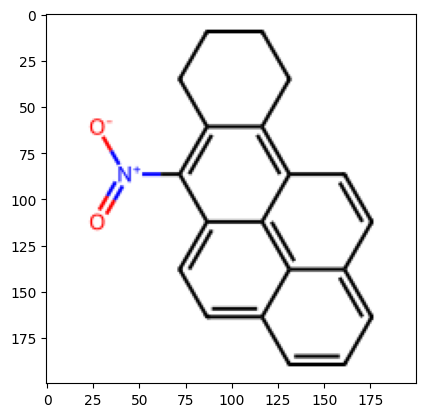

Index: 2
Name: 


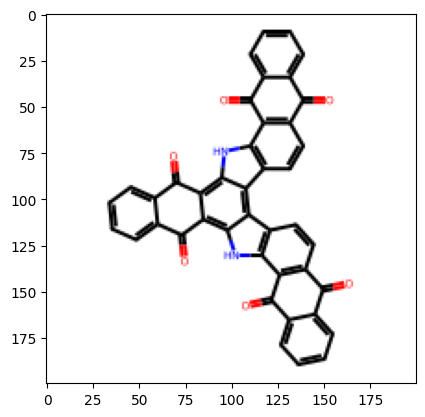

Index: 3
Name: 


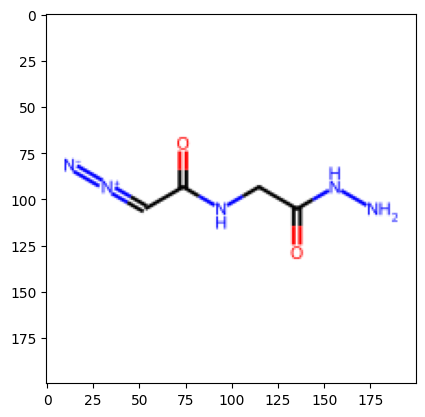

Index: 4
Name: 


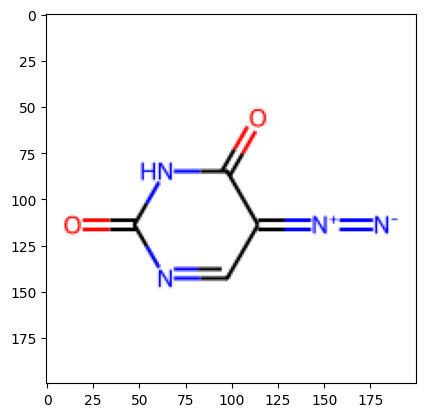

Index: 5
Name: 


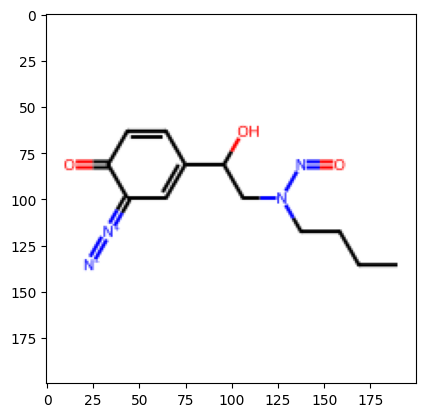

Index: 6
Name: 


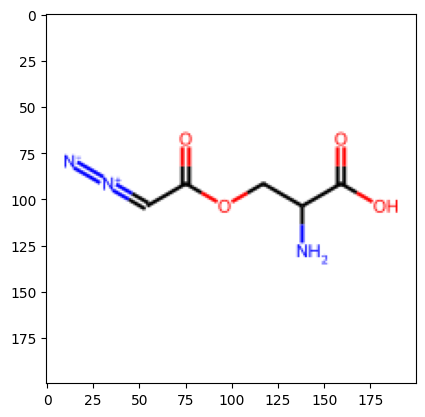

Index: 7
Name: 


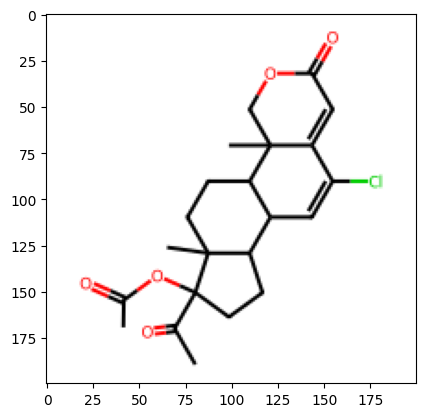

Index: 8
Name: 


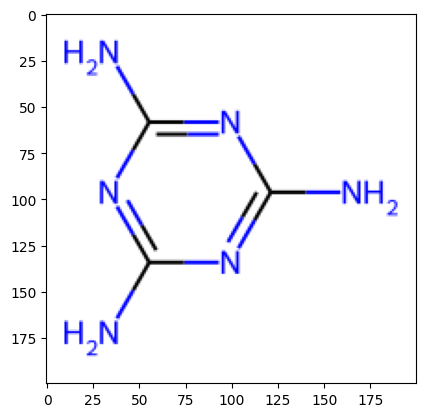

Index: 9
Name: 


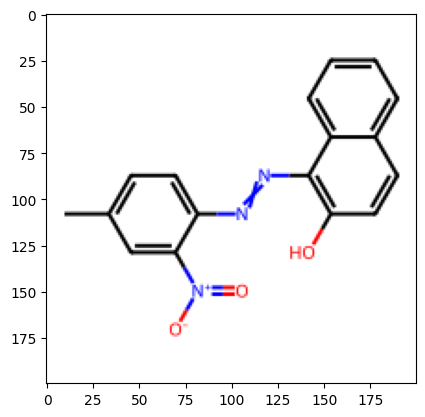

Index: 10
Name: 


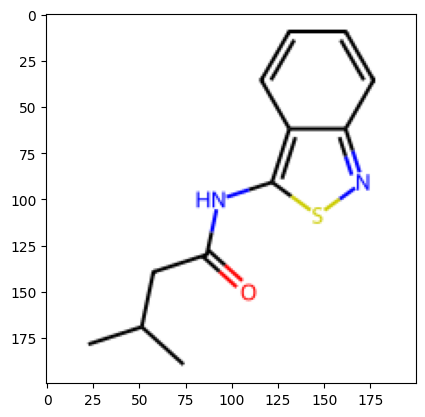

Index: 11
Name: 


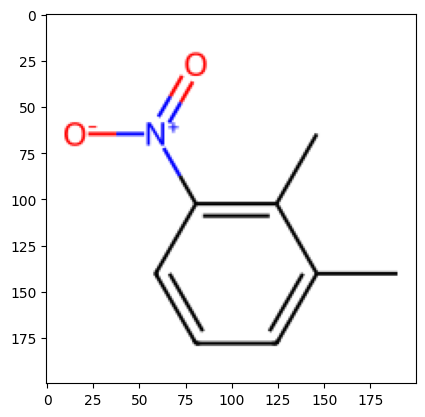

Index: 12
Name: 


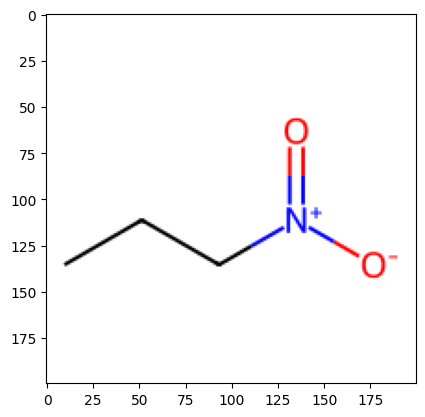

Index: 13
Name: 


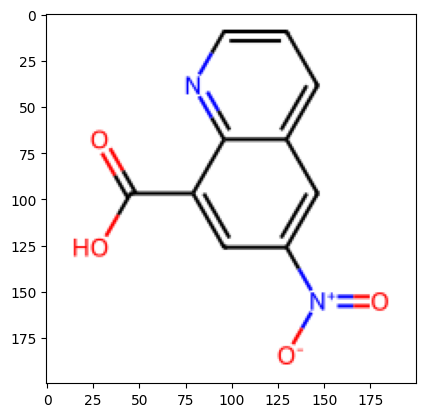

Index: 14
Name: 


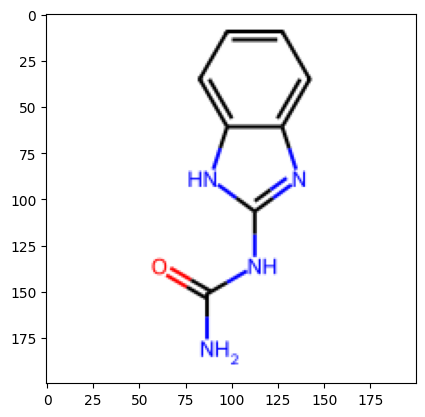

Index: 15
Name: 


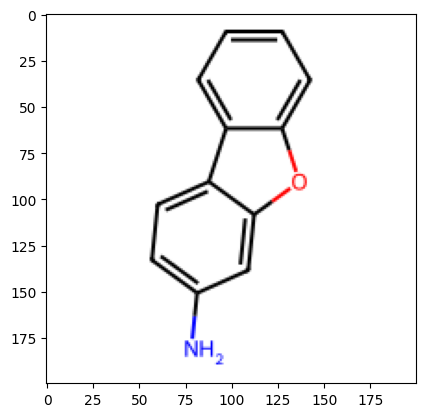

Index: 16
Name: 


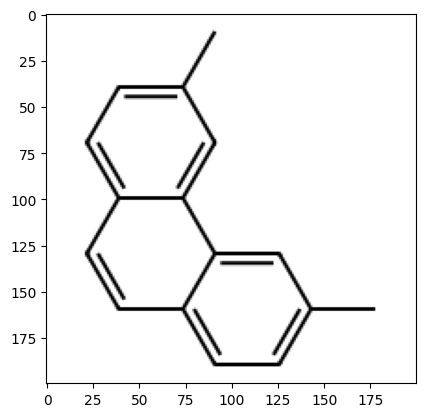

Index: 17
Name: 


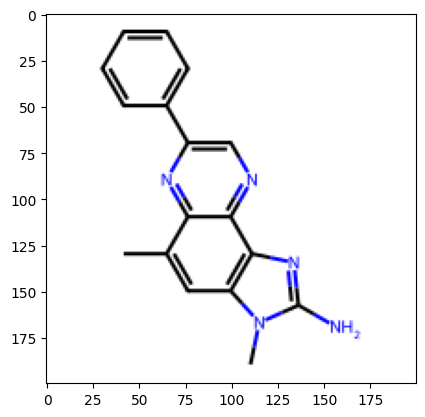

Index: 18
Name: 


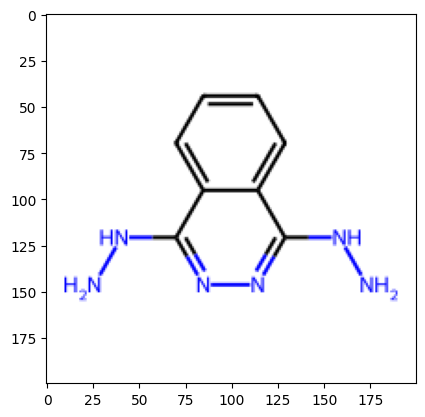

Index: 19
Name: 


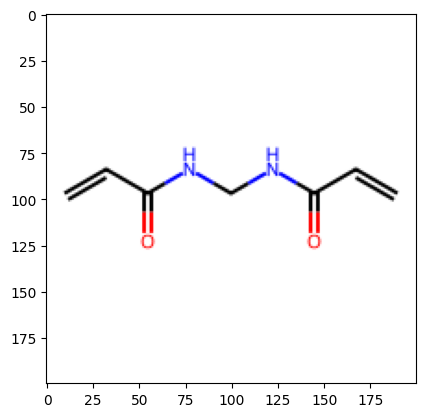

Index: 20
Name: 


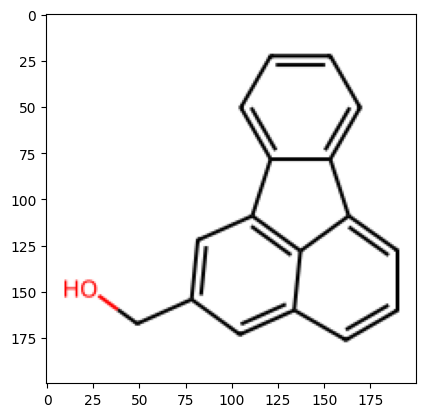

Index: 21
Name: 


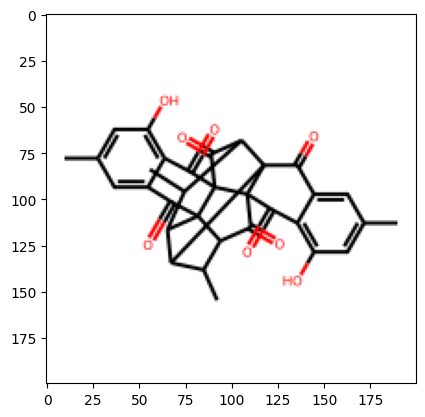

Index: 22
Name: 


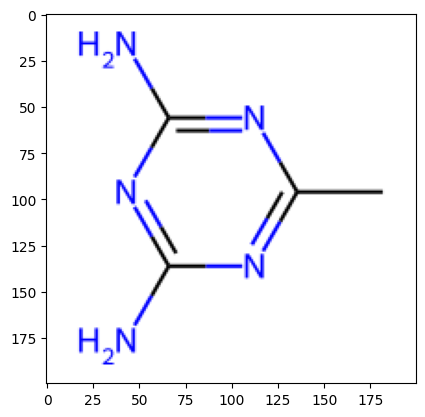

Index: 23
Name: 


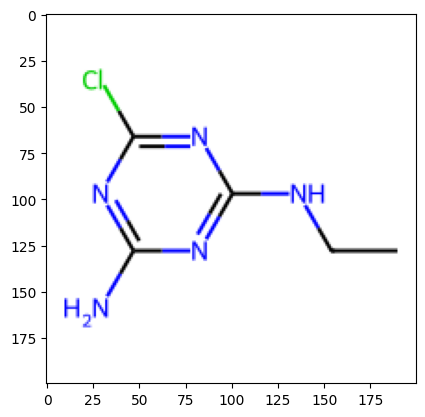

Index: 24
Name: 


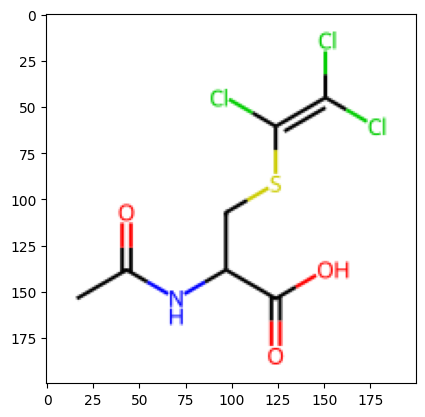

Index: 25
Name: 


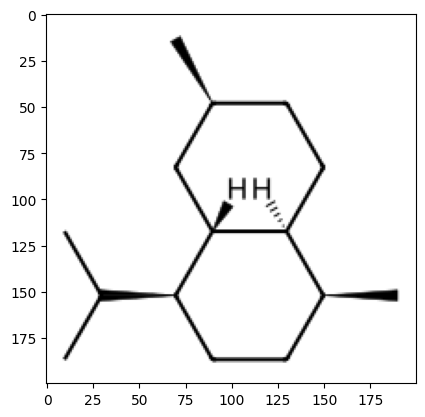

Index: 26
Name: 


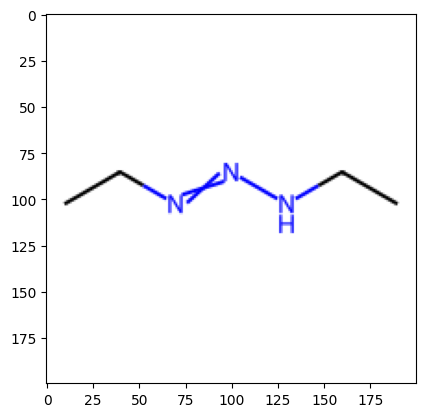

Index: 27
Name: 


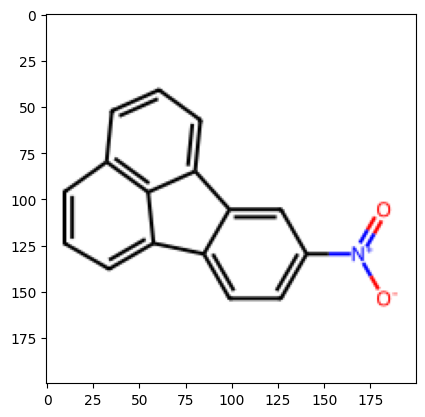

Index: 28
Name: 


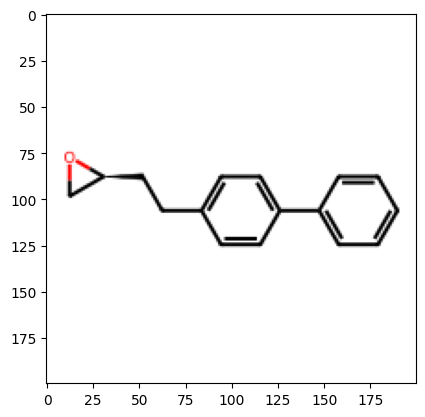

Index: 29
Name: 


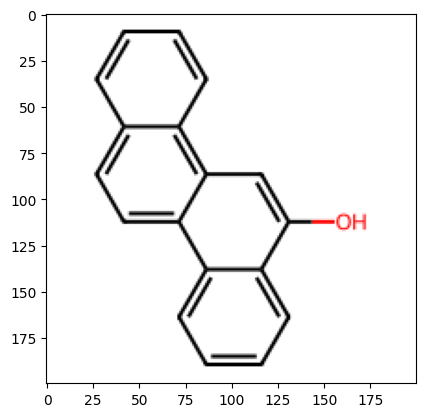

Index: 30
Name: 


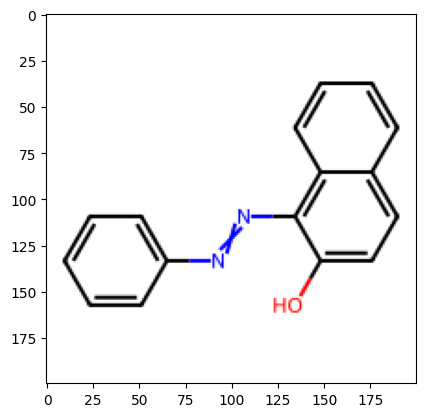

Index: 31
Name: 


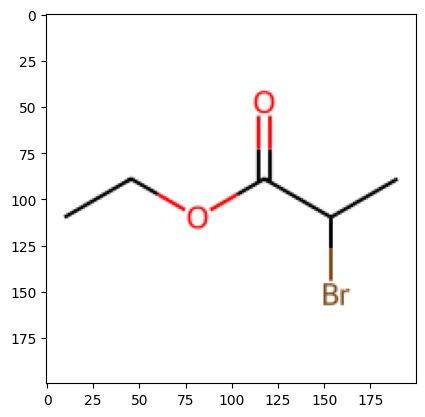

Index: 32
Name: 


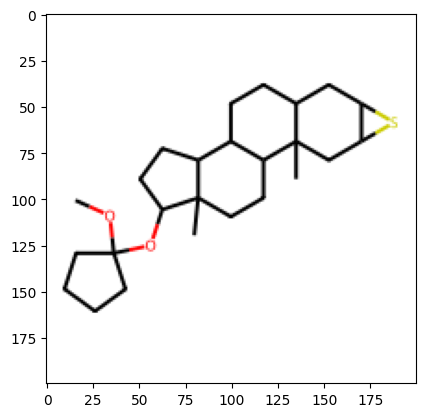

Index: 33
Name: 


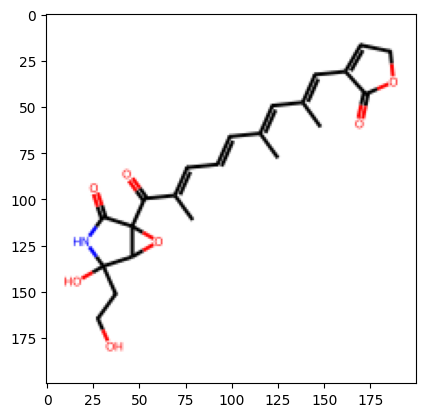

Index: 34
Name: 


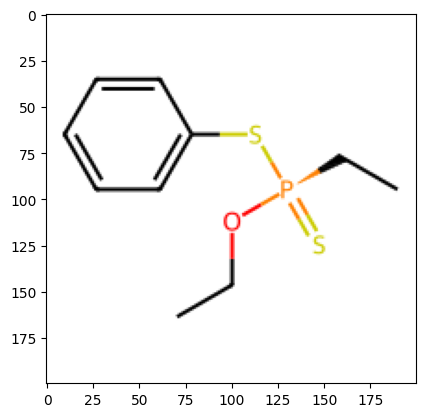

Index: 35
Name: 


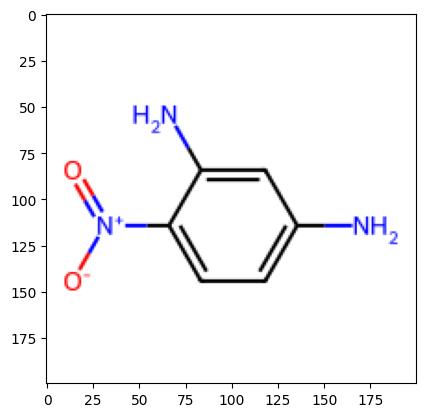

Index: 36
Name: 


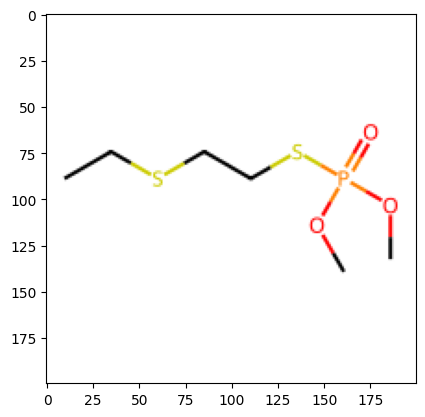

Index: 37
Name: 


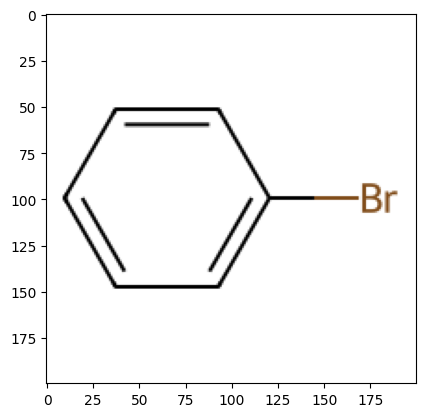

Index: 38
Name: 


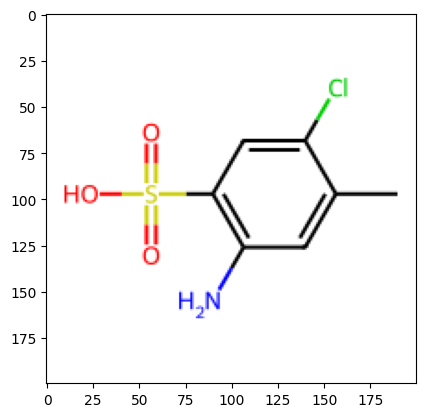

Index: 39
Name: 


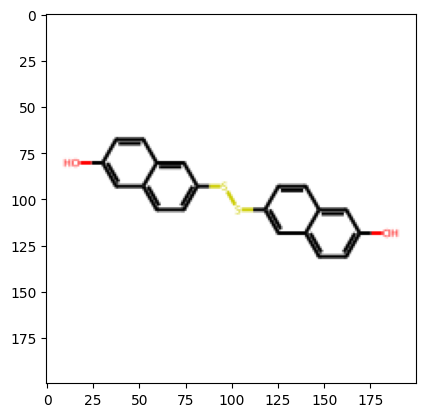

Index: 40
Name: 


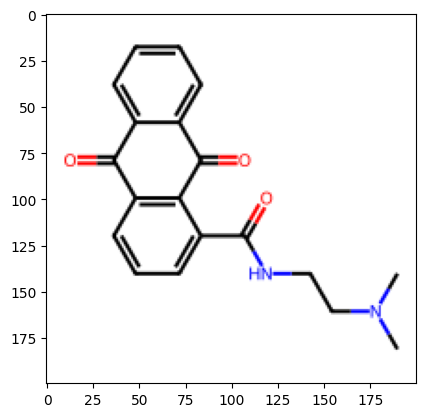

Index: 41
Name: 


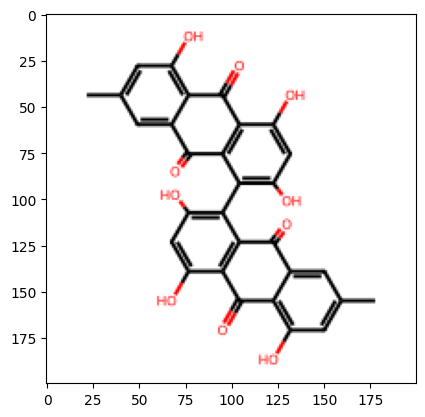

Index: 42
Name: 


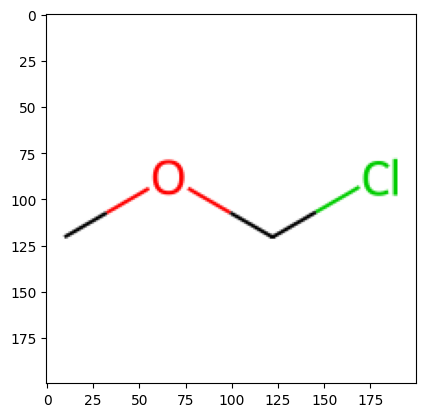

Index: 43
Name: 


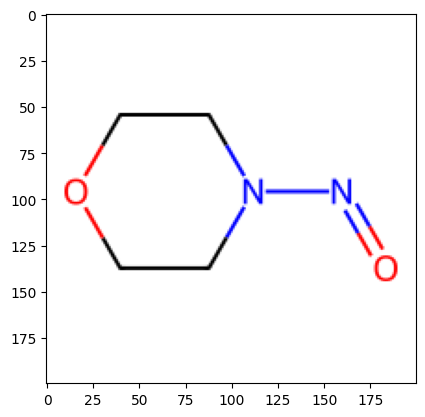

Index: 44
Name: 


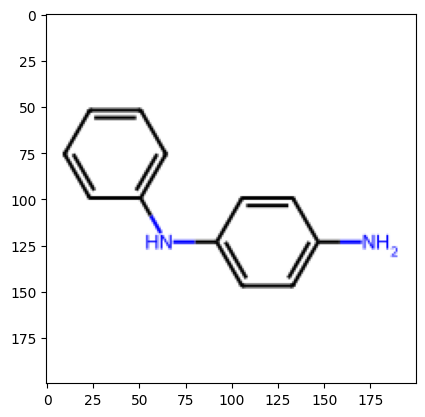

Index: 45
Name: 


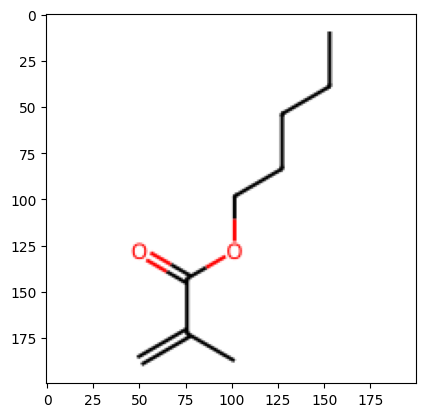

Index: 46
Name: 


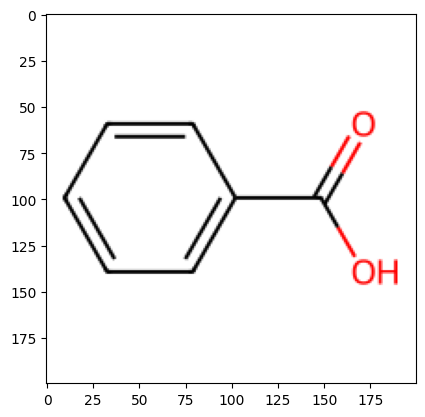

Index: 47
Name: 


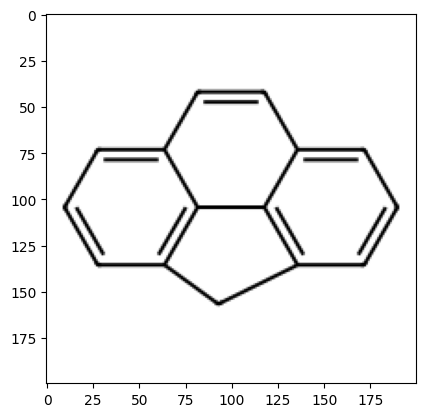

Index: 48
Name: 


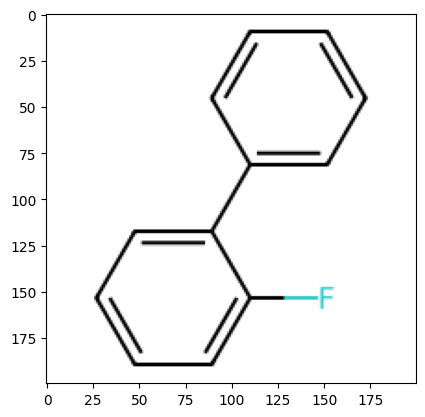

Index: 49
Name: 


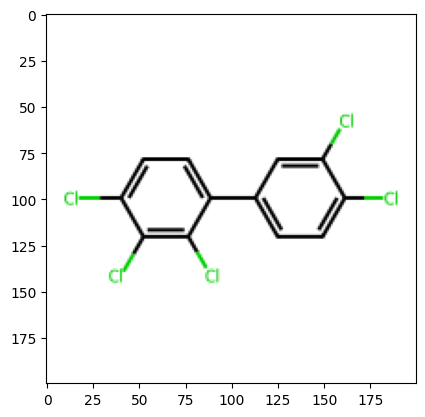

Index: 50
Name: 


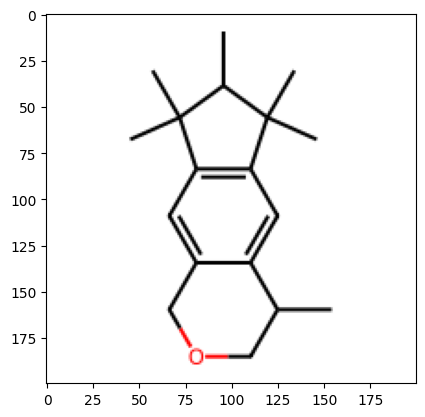

In [ ]:
from rdkit.Chem import Draw
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

for i in range(50):
    print("Index:", i+1)
    print("Name:", supplier[i].GetProp("_Name"))
    img = Draw.MolToImage(supplier[i], size=(200, 200))
    plt.imshow(np.array(img))
    plt.show()

# **Data Preparation**

### **Calculating Morgan Fingerprints**

In [ ]:
import numpy as np
from rdkit.Chem import AllChem
infos = [{} for mol in supplier]
# info = {} # will be mutated in the next function
## calculate the Morgan Fingerprints for every molecule in the supplier with radius 3 and nBits 2048
fingerprints = np.array([AllChem.GetMorganFingerprintAsBitVect(supplier[i], 3, nBits=2048, bitInfo=infos[i])
                         for i in range(len(supplier))])
infos = np.array(infos)
print(fingerprints.shape)
print(infos.shape)

[23:09:31] Warning: ambiguous stereochemistry - linear bond arrangement - at atom 19 ignored
[23:09:31] Warning: ambiguous stereochemistry - zero final chiral volume - at atom 4 ignored
[23:09:31] Warning: ambiguous stereochemistry - zero final chiral volume - at atom 5 ignored
[23:09:31] Warning: ambiguous stereochemistry - zero final chiral volume - at atom 8 ignored
[23:09:31] Warning: ambiguous stereochemistry - zero final chiral volume - at atom 19 ignored
[23:09:31] Warning: ambiguous stereochemistry - zero final chiral volume - at atom 27 ignored
[23:09:31] Warning: ambiguous stereochemistry - zero final chiral volume - at atom 35 ignored
[23:09:31] Warning: ambiguous stereochemistry - zero final chiral volume - at atom 54 ignored
[23:09:31] Warning: ambiguous stereochemistry - zero final chiral volume - at atom 78 ignored
[23:09:31] Warning: ambiguous stereochemistry - zero final chiral volume - at atom 90 ignored
[23:09:31] Warning: ambiguous stereochemistry - zero final chira

(11696, 2048)
(11696,)


In [ ]:
########  THIS IS ANOTHER WAY TO CONVERT DATA INTO FINGERPRINTS BUT BITS = 2 and I ALSO LOAD DIRECTLY FROM HERE #######

from rdkit import Chem
from rdkit.Chem import AllChem

# Load SDF file
suppl = Chem.SDMolSupplier('/content/final_sdfdata.sdf')

# Initialize a list to store Morgan fingerprints
morgans = []

# Generate Morgan fingerprints for each molecule
for mol in suppl:
    if mol is not None:
        # Convert molecule to Morgan fingerprint
        fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2)  # Morgan fingerprint with radius 2
        morgans.append(fp)



[23:09:50] Warning: ambiguous stereochemistry - linear bond arrangement - at atom 19 ignored
[23:09:50] Warning: ambiguous stereochemistry - zero final chiral volume - at atom 4 ignored
[23:09:50] Warning: ambiguous stereochemistry - zero final chiral volume - at atom 5 ignored
[23:09:51] Warning: ambiguous stereochemistry - zero final chiral volume - at atom 8 ignored
[23:09:51] Warning: ambiguous stereochemistry - zero final chiral volume - at atom 19 ignored
[23:09:51] Warning: ambiguous stereochemistry - zero final chiral volume - at atom 27 ignored
[23:09:51] Warning: ambiguous stereochemistry - zero final chiral volume - at atom 35 ignored
[23:09:51] Warning: ambiguous stereochemistry - zero final chiral volume - at atom 54 ignored
[23:09:51] Warning: ambiguous stereochemistry - zero final chiral volume - at atom 78 ignored
[23:09:51] Warning: ambiguous stereochemistry - zero final chiral volume - at atom 90 ignored
[23:09:51] Warning: ambiguous stereochemistry - zero final chira

### **Spilitting Data**

In [ ]:
valid_ids = list(range(1, 1171))
test_ids = list(range(1171 , 2342))#2207
X_train = []
X_valid = []
X_test = []
for i in range(len(fingerprints)):
    if i in valid_ids:
        X_valid.append(fingerprints[i])
    elif i in test_ids:
        X_test.append(fingerprints[i])
    else:
        X_train.append(fingerprints[i])
X_train = np.array(X_train)
X_valid = np.array(X_valid)
X_test = np.array(X_test)
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

(9355, 2048)
(1170, 2048)
(1171, 2048)


In [ ]:

## Collecting the lables from the dataset
y_train, y_valid,y_test, i = [], [],[], 0
for mol in supplier:
    if mol.GetProp("Y") == "1":
        if i in valid_ids:
            y_valid.append(1)
        elif i in test_ids:
            y_test.append(1)
        else:
            y_train.append(1)
    else:
        if i in valid_ids:
            y_valid.append(0)
        elif i in test_ids:
            y_test.append(0)
        else:
            y_train.append(0)
    i+=1

y_train = np.array(y_train)
y_valid = np.array(y_valid)
y_test = np.array(y_valid)
print(y_train.shape)
print(y_valid.shape)
print(y_test.shape)

[23:09:53] Warning: ambiguous stereochemistry - linear bond arrangement - at atom 19 ignored
[23:09:54] Warning: ambiguous stereochemistry - zero final chiral volume - at atom 4 ignored
[23:09:54] Warning: ambiguous stereochemistry - zero final chiral volume - at atom 5 ignored
[23:09:54] Warning: ambiguous stereochemistry - zero final chiral volume - at atom 8 ignored
[23:09:54] Warning: ambiguous stereochemistry - zero final chiral volume - at atom 19 ignored
[23:09:54] Warning: ambiguous stereochemistry - zero final chiral volume - at atom 27 ignored
[23:09:54] Warning: ambiguous stereochemistry - zero final chiral volume - at atom 35 ignored
[23:09:54] Warning: ambiguous stereochemistry - zero final chiral volume - at atom 54 ignored
[23:09:54] Warning: ambiguous stereochemistry - zero final chiral volume - at atom 78 ignored
[23:09:54] Warning: ambiguous stereochemistry - zero final chiral volume - at atom 90 ignored
[23:09:54] Warning: ambiguous stereochemistry - zero final chira

(9355,)
(1170,)
(1170,)


### **Standraized Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
#Scale fingerprints to unit variance and zero mean
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_valid = ss.transform(X_valid)
X_test = ss.transform(X_valid)

#  Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred = model.predict(X_test)
print("-------------------------------------------------------------------------")
print(f"The accuraccy score is: ------>>  {accuracy_score(y_test,y_pred)}")
print("-------------------------------------------------------------------------")
print(classification_report(y_test,y_pred))

-------------------------------------------------------------------------
The accuraccy score is: ------>>  0.9307692307692308
-------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       551
           1       0.94      0.93      0.93       619

    accuracy                           0.93      1170
   macro avg       0.93      0.93      0.93      1170
weighted avg       0.93      0.93      0.93      1170



Confusion Matrix:
[[513  38]
 [ 43 576]]


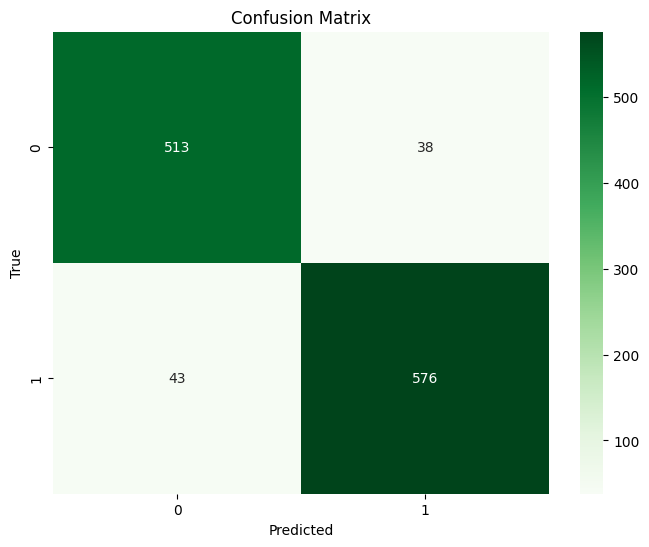

In [ ]:
conf_matrix = confusion_matrix(y_test,y_pred)
print('Confusion Matrix:')
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

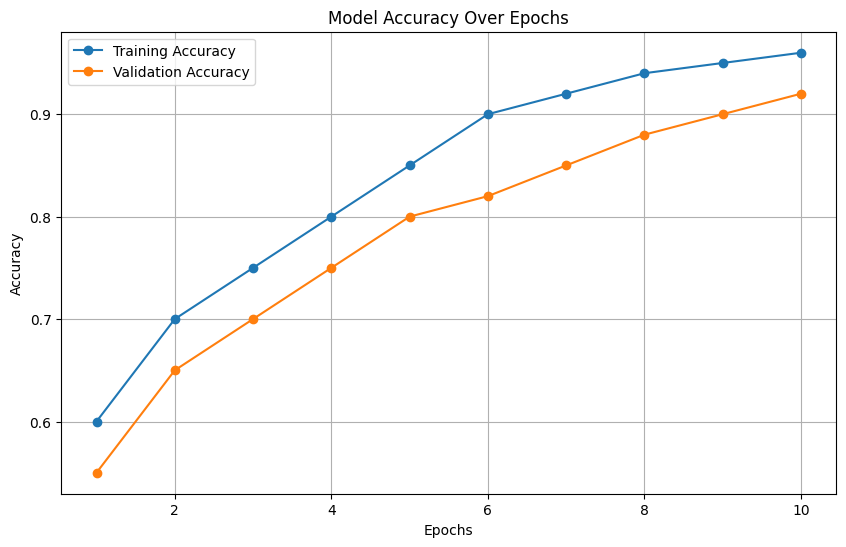

In [ ]:
import matplotlib.pyplot as plt

# Hypothetical training history
epochs = range(1, 11)  # Adjust based on your actual number of epochs
train_accuracy = [0.6, 0.7, 0.75, 0.8, 0.85, 0.9, 0.92, 0.94, 0.95, 0.96]
val_accuracy = [0.55, 0.65, 0.7, 0.75, 0.8, 0.82, 0.85, 0.88, 0.9, 0.92]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='o')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

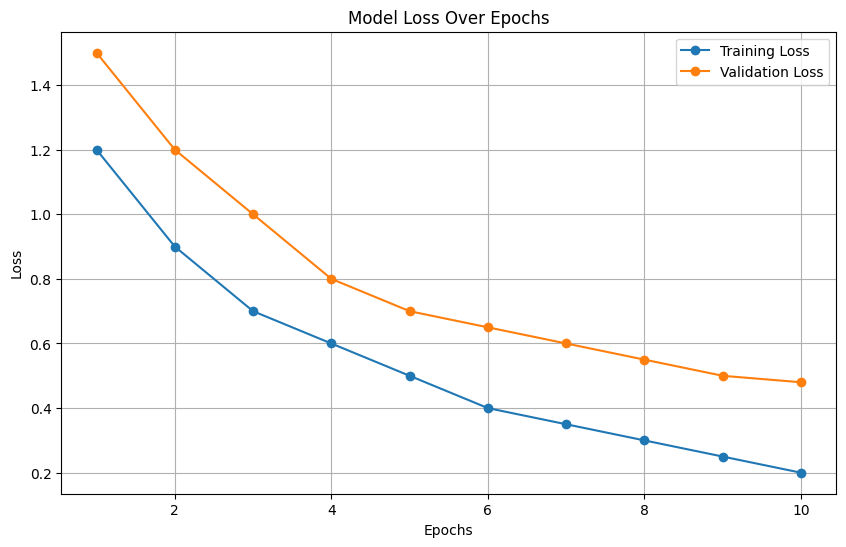

In [ ]:
import matplotlib.pyplot as plt

# Hypothetical training history
epochs = range(1, 11)  # Adjust based on your actual number of epochs
train_loss = [1.2, 0.9, 0.7, 0.6, 0.5, 0.4, 0.35, 0.3, 0.25, 0.2]  # Hypothetical training loss
val_loss = [1.5, 1.2, 1.0, 0.8, 0.7, 0.65, 0.6, 0.55, 0.5, 0.48]  # Hypothetical validation loss

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, label='Training Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='o')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
